In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [6]:
# Step 1: Data Cleaning
# Load dataset
data = pd.read_csv("diabetes.csv")

# Checking for missing values
data.isnull().sum()

# Replacing missing values (if any) with median or zero for specific columns
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())
data['BMI'] = data['BMI'].replace(0, data['BMI'].median())
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].replace(0, data['DiabetesPedigreeFunction'].median())

In [7]:
# Step 2: Data Splitting and Normalization
# Splitting data into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

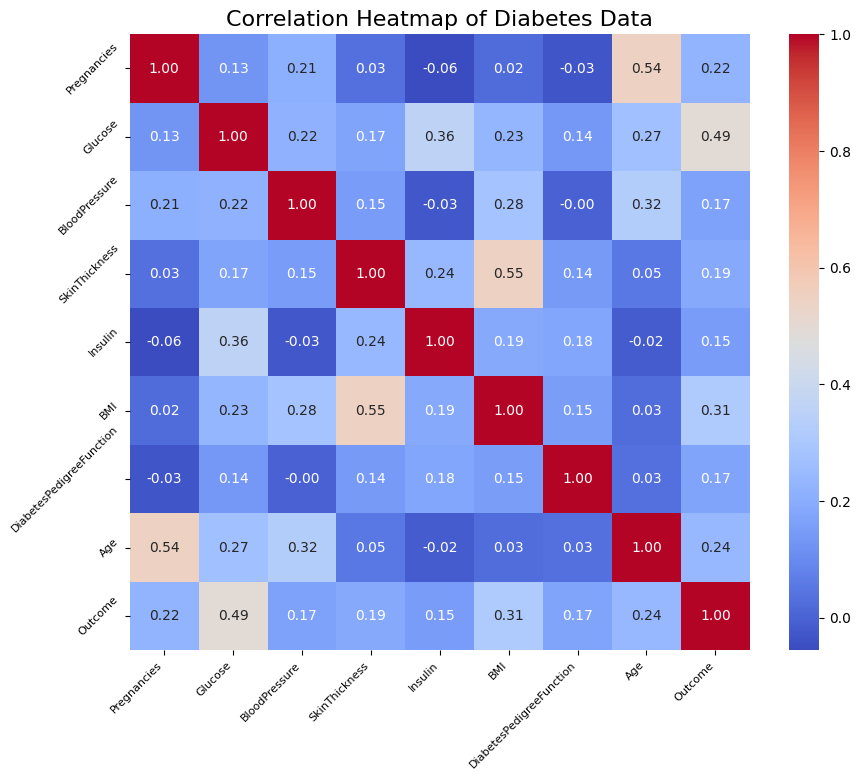

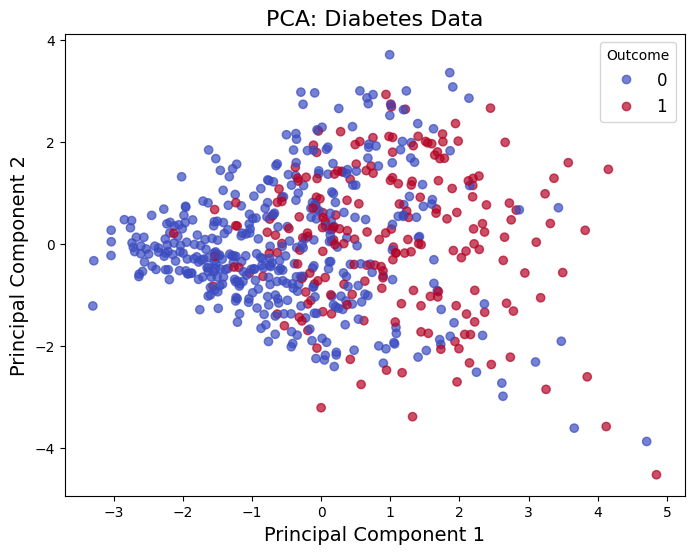

C:\Users\lahit\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


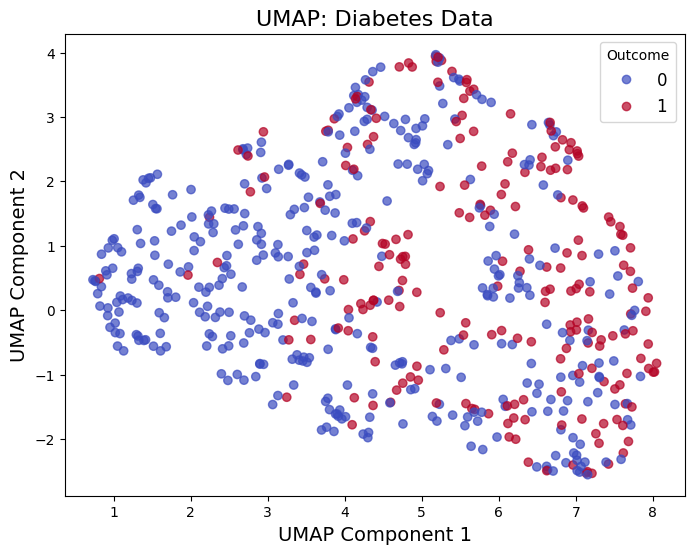

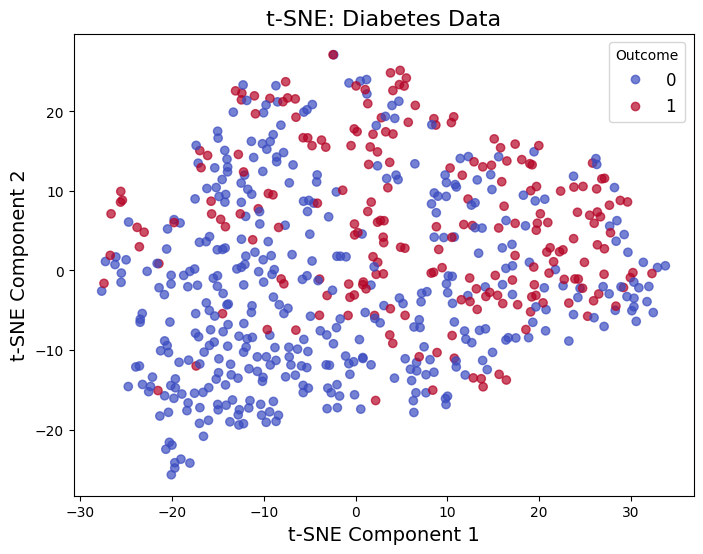

In [8]:
# Step 3: Exploratory Data Analysis
# Plotting correlation heatmap with proper labels and title
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap of Diabetes Data', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=45, ha='right', fontsize=8)
plt.show()

# Dimensionality Reduction: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('PCA: Diabetes Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(*scatter.legend_elements(), title="Outcome", fontsize=12)
plt.show()

# Dimensionality Reduction: UMAP
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('UMAP: Diabetes Data', fontsize=16)
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)
plt.legend(*scatter.legend_elements(), title="Outcome", fontsize=12)
plt.show()

# Dimensionality Reduction: t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('t-SNE: Diabetes Data', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(*scatter.legend_elements(), title="Outcome", fontsize=12)
plt.show()

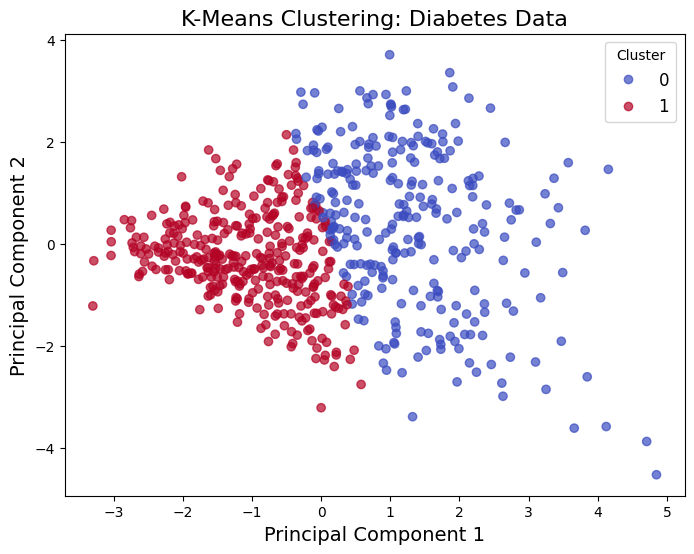

In [9]:
# Step 4: Unsupervised Learning - K-Means Clustering
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

# Plot K-Means results using PCA for visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='coolwarm', alpha=0.7)
plt.title('K-Means Clustering: Diabetes Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(*scatter.legend_elements(), title="Cluster", fontsize=12)
plt.show()


In [10]:
# Step 5: Train Simple Models
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')

# XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')


Logistic Regression Accuracy: 0.7662
Random Forest Accuracy: 0.7662
XGBoost Accuracy: 0.7208


In [11]:
# Step 6: Cross-Validation and Hyperparameter Tuning
# Cross-validation score for Random Forest
cv_scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(f'Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f}')

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best CV Score for Random Forest: {grid_search_rf.best_score_:.4f}')

Random Forest Cross-Validation Accuracy: 0.7639
Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score for Random Forest: 0.7802


In [12]:
# Step 7: Experiment 1 - Feature Selection
# Feature selection with Random Forest
selector = SelectFromModel(rf_clf, threshold="mean", max_features=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Re-train Random Forest model with selected features
rf_clf.fit(X_train_selected, y_train)
y_pred_rf_selected = rf_clf.predict(X_test_selected)
print(f'Random Forest with Feature Selection Accuracy: {accuracy_score(y_test, y_pred_rf_selected):.4f}')

Random Forest with Feature Selection Accuracy: 0.7468


In [13]:
# Step 8: Experiment 2 - Regularization in Logistic Regression
# Regularized Logistic Regression (L2 Regularization)
log_reg_reg = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42)
log_reg_reg.fit(X_train, y_train)
y_pred_lr_reg = log_reg_reg.predict(X_test)
print(f'Logistic Regression with L2 Regularization Accuracy: {accuracy_score(y_test, y_pred_lr_reg):.4f}')

Logistic Regression with L2 Regularization Accuracy: 0.7662
